В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів `Keras`, яка буде класифікувати товари із датасету `fasion_mnist`.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з такими параметрами мережі як: кількість шарів, кількість нейронів, функції активації, кількість епох, розмір батчу і т.д. Рішення оформіть у вигляді окремого ноутбука.

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [26]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Reshape

In [34]:
model = Sequential()

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))


model.add(Dense(units=10, activation='softmax'))

In [35]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
%%time
history = model.fit(x_train, y_train, batch_size=32, epochs=14, validation_split=0.2)

Epoch 1/14
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5668 - accuracy: 0.7947 - val_loss: 0.4565 - val_accuracy: 0.8409
Epoch 2/14
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4210 - accuracy: 0.8475 - val_loss: 0.3923 - val_accuracy: 0.8549
Epoch 3/14
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3776 - accuracy: 0.8617 - val_loss: 0.4033 - val_accuracy: 0.8553
Epoch 4/14
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3573 - accuracy: 0.8681 - val_loss: 0.3477 - val_accuracy: 0.8798
Epoch 5/14
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3351 - accuracy: 0.8782 - val_loss: 0.3367 - val_accuracy: 0.8810
Epoch 6/14
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3240 - accuracy: 0.8827 - val_loss: 0.3351 - val_accuracy: 0.8819
Epoch 7/14
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3059 - accuracy: 0.8897 - val_loss: 0.3836 - val_accuracy:

In [37]:
accuracy_test = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8830


точність моделі на **тренувальних** даних = 90.78 %

точність моделі на **валідаційних** даних = 89,07 %

точність моделі на **тестових даних** = 88.30 %

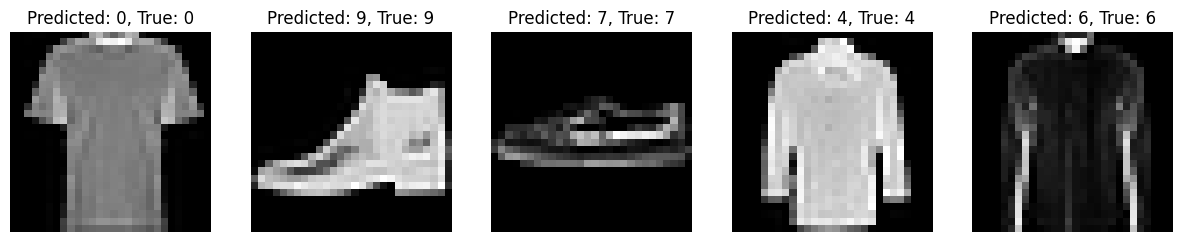

In [38]:
random_indices = np.random.choice(len(x_test), 5, replace=False)

images = x_test[random_indices]
labels = y_test[random_indices]

predictions = model(images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Predicted: {predicted_labels[i]}, True: {labels[i]}')
    ax.axis('off')